1. Problem Definition
Predicting survival on the Titanic based on various features like age, sex, passenger class, etc.










2. Data Collection
The Titanic dataset is readily available on platforms like Kaggle or use seaborn datasets. It typically includes features like Passenger ID, Survived (target variable), Pclass, Name, Sex, Age, SibSp (siblings/spouses aboard), Parch (parents/children aboard), Ticket, Fare, Cabin, and Embarked.


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
titanic_data = sns.load_dataset("titanic")
df_titanic = pd.DataFrame(titanic_data)
df_titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


3. Data Cleaning and Preprocessing
Handle missing values: For instance, fill missing ages with the median age or predict ages using another model.
Convert categorical variables into numerical ones, e.g., using one-hot encoding for the Embarked and Sex columns.
Drop features that may not contribute to the model like Ticket and Name (unless extracting titles from names).

In [ ]:
from sklearn.preprocessing import OneHotEncoder
df_titanic["age"] = df_titanic['age'].fillna(df_titanic['age'].mean()).astype(int)
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df_titanic[["sex","embarked"]]).toarray()
encoded_columns = encoder.get_feature_names_out(["sex","embarked"])
df_encoded = pd.DataFrame(encoded, columns=encoded_columns)
df_titanic = pd.concat([df_titanic, df_encoded], axis=1)
df_titanic
df_titanic = df_titanic.drop(['embark_town','fare','class','who','deck'],axis=1)
df_titanic

,survived,pclass,sex,age,sibsp,parch,embarked,adult_male,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,male,22,1,0,S,True,no,False,0.0,1.0,0.0,0.0,1.0,0.0
1,1,1,female,38,1,0,C,False,yes,False,1.0,0.0,1.0,0.0,0.0,0.0
2,1,3,female,26,0,0,S,False,yes,True,1.0,0.0,0.0,0.0,1.0,0.0
3,1,1,female,35,1,0,S,False,yes,False,1.0,0.0,0.0,0.0,1.0,0.0
4,0,3,male,35,0,0,S,True,no,True,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,S,True,no,True,0.0,1.0,0.0,0.0,1.0,0.0
887,1,1,female,19,0,0,S,False,yes,True,1.0,0.0,0.0,0.0,1.0,0.0
888,0,3,female,29,1,2,S,False,no,False,1.0,0.0,0.0,0.0,1.0,0.0
889,1,1,male,26,0,0,C,True,yes,True,0.0,1.0,1.0,0.0,0.0,0.0


4. Exploratory Data Analysis (EDA)
Analyze the distribution of key features and their relationship to the target variable, Survived.
Use visualizations to understand the data better: histograms, box plots, and scatter plots.
Investigate correlations between features.

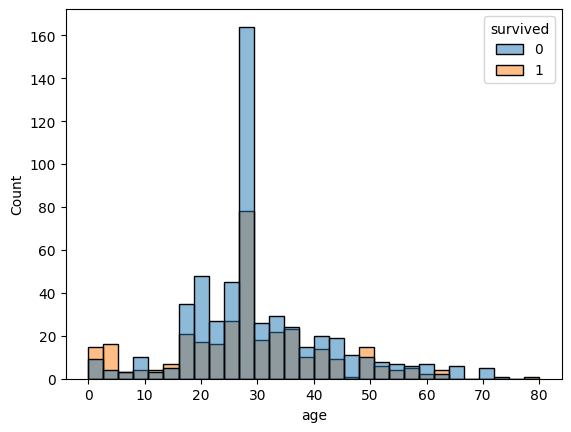

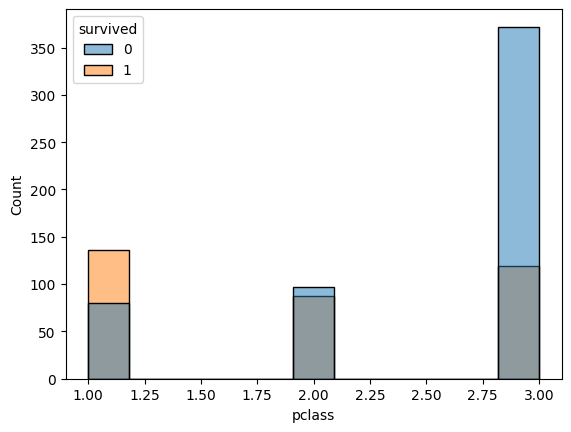

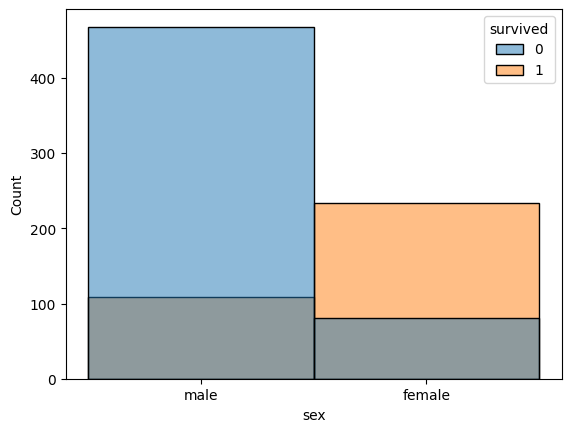

In [ ]:
sns.histplot(data = df_titanic, x = "age", hue = "survived")
plt.show()
sns.histplot(data = df_titanic, x = "pclass", hue = "survived")
plt.show()
sns.histplot(data = df_titanic, x = "sex", hue = "survived")
plt.show()

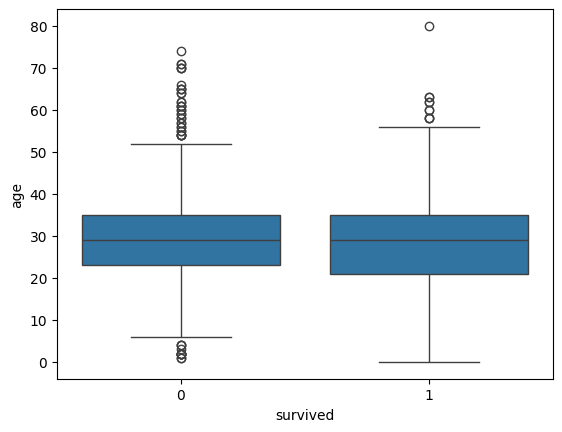

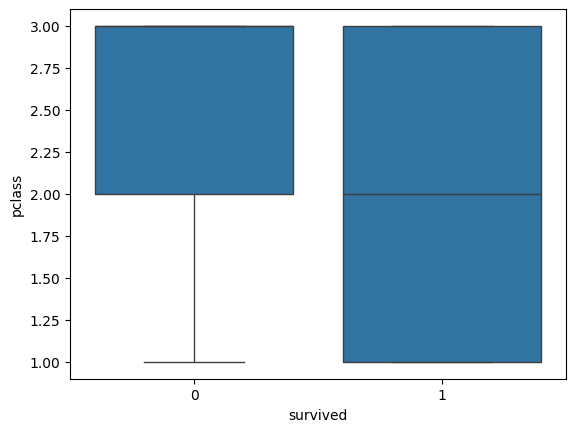

In [ ]:
sns.boxplot(data = df_titanic, x = "survived", y = "age")
plt.show()
sns.boxplot(data = df_titanic, x = "survived", y = "pclass")
plt.show()

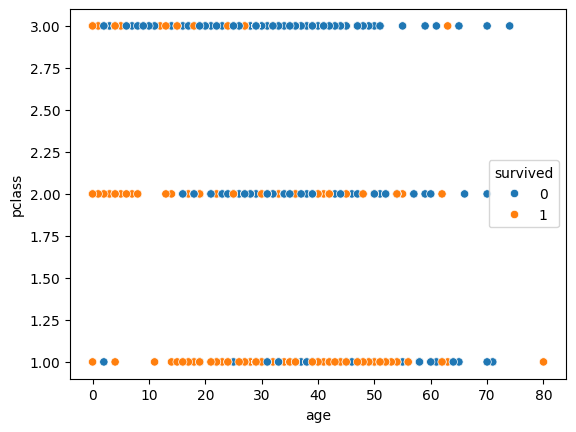

<Axes: >

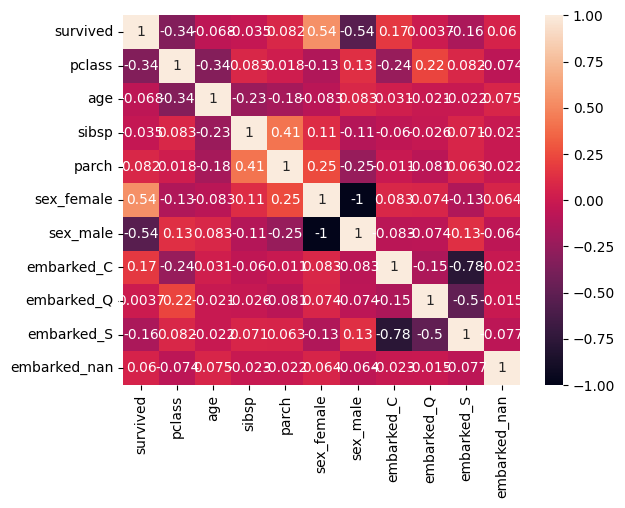

In [ ]:
sns.scatterplot(data = df_titanic, x = "age", y = "pclass", hue = "survived")
plt.show()
sns.heatmap(df_titanic.select_dtypes(include="number").corr(), annot=True)

5. Feature Engineering
Create new features that might help improve the model, such as:
FamilySize = SibSp + Parch + 1
IsAlone, a binary indicator of whether the passenger is alone.
Title extracted from the name as a proxy for social status.


In [ ]:
df_titanic["FamilySize"] = df_titanic['sibsp'] + df_titanic['parch'] + 1
df_titanic['IsAlone'] = df_titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)


In [ ]:
df_titanic = df_titanic.drop(['sibsp','parch',"sex","embarked","alive"],axis=1)
df_titanic["IsChild"] = df_titanic['age'].apply(lambda x: 1 if x < 18 else 0)
df_titanic

,survived,pclass,age,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan,FamilySize,IsAlone,IsChild
0,0,3,22,True,False,0.0,1.0,0.0,0.0,1.0,0.0,2,0,0
1,1,1,38,False,False,1.0,0.0,1.0,0.0,0.0,0.0,2,0,0
2,1,3,26,False,True,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0
3,1,1,35,False,False,1.0,0.0,0.0,0.0,1.0,0.0,2,0,0
4,0,3,35,True,True,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27,True,True,0.0,1.0,0.0,0.0,1.0,0.0,1,1,0
887,1,1,19,False,True,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0
888,0,3,29,False,False,1.0,0.0,0.0,0.0,1.0,0.0,4,0,0
889,1,1,26,True,True,0.0,1.0,1.0,0.0,0.0,0.0,1,1,0


Scale features if using models sensitive to feature scaling, such as SVM or KNN.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_scalered = ["age","pclass","FamilySize"]
df_titanic[columns_scalered] = scaler.fit_transform(df_titanic[columns_scalered])
df_titanic

,survived,pclass,age,adult_male,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,embarked_nan,FamilySize,IsAlone,IsChild
0,0,0.827377,-0.580044,True,False,0.0,1.0,0.0,0.0,1.0,0.0,0.059160,0,0
1,1,-1.566107,0.650112,False,False,1.0,0.0,1.0,0.0,0.0,0.0,0.059160,0,0
2,1,0.827377,-0.272505,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-0.560975,1,0
3,1,-1.566107,0.419458,False,False,1.0,0.0,0.0,0.0,1.0,0.0,0.059160,0,0
4,0,0.827377,0.419458,True,True,0.0,1.0,0.0,0.0,1.0,0.0,-0.560975,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.369365,-0.195620,True,True,0.0,1.0,0.0,0.0,1.0,0.0,-0.560975,1,0
887,1,-1.566107,-0.810699,False,True,1.0,0.0,0.0,0.0,1.0,0.0,-0.560975,1,0
888,0,0.827377,-0.041851,False,False,1.0,0.0,0.0,0.0,1.0,0.0,1.299429,0,0
889,1,-1.566107,-0.272505,True,True,0.0,1.0,1.0,0.0,0.0,0.0,-0.560975,1,0


6. Model Selection
Split the data into training and test sets to evaluate the performance of your models.

In [ ]:
from sklearn.model_selection import train_test_split
X = df_titanic.drop("survived", axis = 1)
y = df_titanic["survived"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


Train different models to see which performs best. Start with simple models like Logistic Regression and move to more complex ones like Random Forests, Gradient Boosting, or even neural networks.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
print(accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
y_pred_rf = model_rf.predict(X_test)
print(accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb = GradientBoostingClassifier()
model_gb.fit(X_train,y_train)
y_pred_gb = model_gb.predict(X_test)
print(accuracy_score(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb))

0.8268156424581006
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.70      0.77        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



Use cross-validation to estimate the effectiveness of each model.

In [ ]:
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(model_lr,X,y,cv=5)
scores_rf = cross_val_score(model_rf,X,y,cv=5)
scores_gb = cross_val_score(model_gb,X,y,cv=5)
print("Logistic Regression:")
print(f"Accuracy scores: {scores_lr}")
print(f"Mean accuracy: {scores_lr.mean():.4f}")
print(f"Standard deviation: {scores_lr.std():.4f}\n")

print("Random Forest:")
print(f"Accuracy scores: {scores_rf}")
print(f"Mean accuracy: {scores_rf.mean():.4f}")
print(f"Standard deviation: {scores_rf.std():.4f}\n")

print("Gradient Boosting:")
print(f"Accuracy scores: {scores_gb}")
print(f"Mean accuracy: {scores_gb.mean():.4f}")
print(f"Standard deviation: {scores_gb.std():.4f}")

Logistic Regression:
Accuracy scores: [0.81564246 0.81460674 0.80337079 0.80337079 0.84831461]
Mean accuracy: 0.8171
Standard deviation: 0.0165

Random Forest:
Accuracy scores: [0.75418994 0.78651685 0.8258427  0.83146067 0.8258427 ]
Mean accuracy: 0.8048
Standard deviation: 0.0300

Gradient Boosting:
Accuracy scores: [0.79888268 0.82022472 0.84831461 0.82022472 0.84831461]
Mean accuracy: 0.8272
Standard deviation: 0.0189


7. Model Evaluation
Evaluate models based on accuracy, precision, recall, F1 score, and other relevant metrics.
Use confusion matrices to understand the performance of your model in classifying survivors and non-survivors.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
confusion_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix_lr)
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix_rf)
print("\nGradient Boosting Confusion Matrix:")
print(confusion_matrix_gb)
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
print("\nLogistic Regression Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
print("\nRandom Forest Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
acc = accuracy_score(y_test, y_pred_gb)
prec = precision_score(y_test, y_pred_gb)
rec = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
print("\nGradient Boosting Metrics:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

Logistic Regression Confusion Matrix:
[[92 13]
 [19 55]]

Random Forest Confusion Matrix:
[[91 14]
 [18 56]]

Gradient Boosting Confusion Matrix:
[[96  9]
 [22 52]]

Logistic Regression Metrics:
Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1 Score: 0.7746

Random Forest Metrics:
Accuracy: 0.8212
Precision: 0.8000
Recall: 0.7568
F1 Score: 0.7778

Gradient Boosting Metrics:
Accuracy: 0.8268
Precision: 0.8525
Recall: 0.7027
F1 Score: 0.7704


8. Fine-tuning and Validation
Use grid search or random search to fine-tune your model parameters.
Validate your final model on the test set to estimate how well it will perform on unseen data.

In [ ]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)
print("Best Parameters:", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)

Best Parameters: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.763788438365758


A model was built in the project to predict the survival of Titanic passengers. After data preprocessing and comparing several models, the best results were shown by the Random Forest algorithm, which was fine-tuned using GridSearchCV. The model successfully passed validation on the test set, demonstrating high accuracy and a balanced F1-score.